# RX1: Importing Data and Histograms 

Spatial variation in velocity and depth over a stream reach is one of the most important factors regulating stream ecosystem structure and function. The habitat of plants, invertebrates, and fish is strongly influenced by these variables and by the resulting flow characteristics. Human modification of streams, especially flow regulation and riverbed channelization, is therefore altering local habitat suitability.

![](https://i.imgur.com/R4jTkKH.gif)


In this exercise, we will explore the **distributions of depth and velocity in streams**, as well as their **joint distribution**. Along the way, we will cover various R functions for working with both **empirical (i.e. data-based) and theoretical distributions**.

## Importing Data Using Scripts

Lamouroux and Jowett (2005) reported in-stream data  from  92  stream  reaches  in  New  Zealand. Each  reach  was  surveyed  once  to  obtain  a  set  of **velocity-depth     pairs**     representing     *hydraulic conditions* at various points throughout the reach at  the  time  of  the  survey.Here  we  focus  on  the **275**  point  data  collected  at  the  river  Opihi.

![](https://i.imgur.com/tjDug71.png)

There are two ways we can import data in to R. The provided solutions will use the SECOND way, and we recommend this way too. However, it is important to know both. That way, you can chose which one you prefer.

Option 1: Setting a working directory. This requires you to download the data on to your local machine and access it directly. 

First, you must download the data from Canvas. It is under:

Files > RX > "Opihi.txt"

Save this file to your hard drive, and **REMEMBER ITS LOCATION**. You will need to know which in which directory it resides (for example, "Downloads") in order to use it. 

Please note that files must be TEXT files (.txt). In some future RX assignments, Canvas files are excel (.xls) files. When you download them, you will need to *SaveAs -> .txt file* in order to proceed with this method.  

Now we are going to **set our working directory**. This is done with thr R command: **setwd()**

This command takes the string of the *directory path* as an argument. The directory path we want to use is the one in which "Opihi.txt" is stored. For example, if you are on a personal computer and stored the file in your *Downloads*, your command may look something like this:

```
setwd("/Users/your_name/Downloads")

```

Once you do this, we can access the .txt file (and any other file in this direcotry) straight from the command line. **Make sure your path is in "quotations", and note the use of FORWARD SLASHES!**

Now you can create an R object to hold all of this data using the **read.table()** command, which works as follows:
```
Robject_name = read.table("TextFileName.txt", header=TRUE)
```
In this case, our file is called "Opihi.txt". Name your R object apropriately. We suggest "opihi".

Note the arguments here - We want **header=TRUE** to indicate that the data has column headers

---------------

Option 2: Reading from Github Repository. 

We can also access all of our text files through a git repository. We have one for this class through Dartmouth's DIFUSE project. You do not need to download anything from Canvas. This is the command we will use:
 
Robject_name <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/Opihi.txt", header = TRUE, sep = "\t", dec = ".")


Where:
- Robject_name is the name of your R object you wish to create
- Opihi.txt is the text file we are trying to access. In future RX assignments, this will change depending on which file we want to use. 

Note the use of '<-' for assigning instead of '=', and that the url to the GitHub is in quotations! 

All files in the Github are text files, so no conversion is needed. 


---------------
--------------

**EXERCISE 1:** Using one of the options described above read the data from "Opihi.txt" into an R object called "opihi". 


In [11]:
3+3

[1] 6

In [1]:
opihi <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/Opihi.txt", header = TRUE, sep = "\t", dec = ".")


<span class="girk">**EXERCISE 2:**</span>  Double check you did this correctly, lets check what the first value for Depth is, in other words, the *first value in the second column*. Recall you can do this by indexing:

```
R_object[row, column]

```

Did you get 0.18? 

In [2]:
opihi[1,2]


[1] 0.18

<span class="girk">**EXERCISE 2:**</span> Use the **attach()** command on your new R object so that we can refer to the variables in the data by their names alone. Refer back to RX0 if you need a refresher on this command! Once you are finished, view a summary of the data. 


In [3]:
attach(opihi)
summary(opihi)

     Name               Depth           Velocity     
 Length:275         Min.   :0.0300   Min.   :0.2249  
 Class :character   1st Qu.:0.2550   1st Qu.:1.1493  
 Mode  :character   Median :0.3700   Median :1.6320  
                    Mean   :0.3586   Mean   :1.5893  
                    3rd Qu.:0.4500   3rd Qu.:2.0089  
                    Max.   :0.7200   Max.   :3.3914  

## Univariate Distributions

### Histograms and density functions


<span class="girk">**EXERCISE 3:**</span> Recall that R has commands **mean()** and **sd()** to calculate the mean and standard deviation of a variable.

Calculate the mean and standard deviation of Depth, and *save these valubles into new the new variables*:

``` xbar.d ``` (mean Depth) 
```  s.d ```(standard deviation of Depth) 

You can then output these variables to check they are the right values. Does the mean match the value you saw in your summary in Exercise 2?

In [4]:
xbar.d = mean(Depth)
s.d = sd(Depth)
xbar.d
s.d

[1] 0.3586182

[1] 0.1407757

<span class="girk">**EXERCISE 4:**</span> Repeat Exercise 3 for the variable Velocity. Use these new varible names:

``` xbar.v ``` (mean Velocity) 
```  s.v ```(standard deviation of Velocity) 

In [5]:
xbar.v = mean(Velocity)
s.v = sd(Velocity)
xbar.v
s.v

[1] 1.589291

[1] 0.5812773

<span class="girk">**EXERCISE 5:**</span> Use the **hist( )** command that you learned last week to plot a histogram of **Velocity**, using the argument “probability=TRUE” to normalize the probabilities. Does the histogram look approximately Normal (i.e. is it approximately symmetric and bell- shaped)?

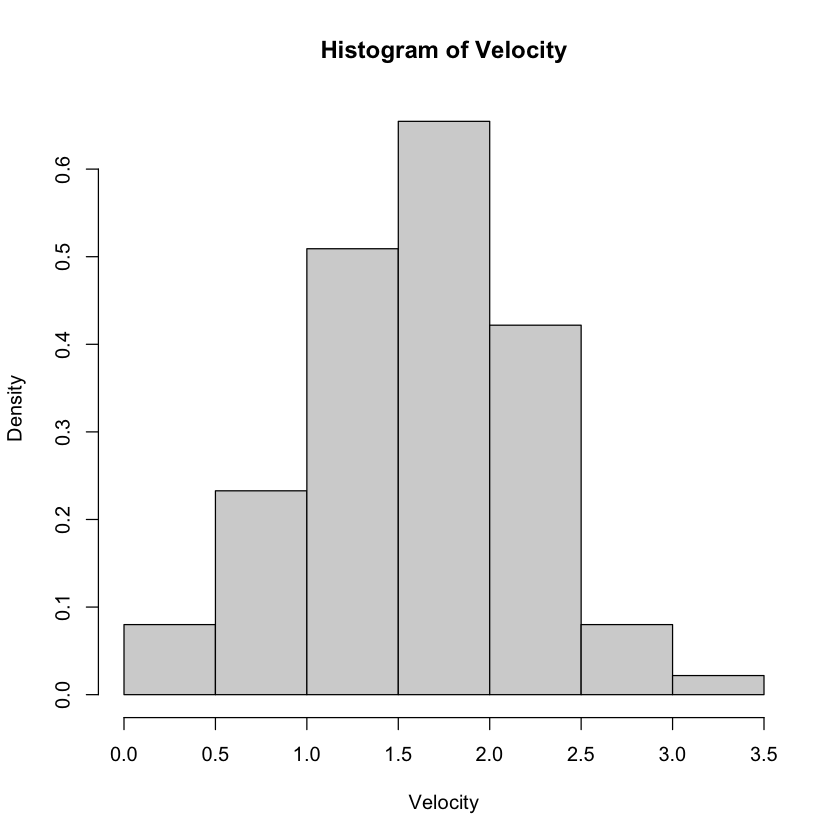

In [6]:
hist(Velocity, probability=TRUE)

Recall that Normal Distribution is a continue probability distribution represented by a bell-shaped curve. Lets add one to our histogram. We will need to first create a vector called **x.v**. We can do this with the **seq()** command, which is a *sequence generator*. The arguments of this command are as follows:

```seq(from= , to= , by= )```

where *from* and *to* are the beginning and end of your range, and *by* is your increment size. 

<span class="girk">**EXERCISE 6:**</span> Create an R object **x.v** that is a vector spanning the range of Velocity values. (Hint: We suggest picking a small increment value, like 0.01) The range values do not have to be exact, but should effectibly capture the entire range of Velocity values.


In [7]:
x.v=seq(from=0, to=4, by=0.01)

The next step is to calculate the value of the Normal density function at each value of x.v. We can do this using the calculated mean and standard deviation of your data from previous exercises.

We will need to use 2 commands to do this. The first is **dnorm()**, which returns the value of the probability density function for the normal distribution. Its arguments are as follows:

```dnorm(value, mean = , sd = )```

Note that this will return a single value if the *first* argument is a single value. However, we will want to pass our **x.v** vector as the first argument so that it returns a **vector** of **all** the density values. 

<span class="girk">**EXERCISE 7:**</span> Use **dnorm()** and the mean and sd values for Velocity to create a new vector **y.v** that holds the value of the Normal density function at each value of **x.v**.

Hint:In previous exercises we *already* saved the mean and sd in two variables! Use them as arguments to make life a little easier.  


In [8]:
y.v=dnorm(x.v, mean=xbar.v, sd=s.v)

Finally, lets create our desired line using the **lines()** command. This command adds a function to a plot. **NOTE** - you will have to plot your histogram before you call this command, so use your answer to Exercise 5 before calling lines().

The syntax for lines is:

```lines(v1~v2)``` where v1 is thr variable on the y axis and v2 is the variable on the x axis. Think about which of your variables would take thier place....


<span class="girk">**EXERCISE 8:**</span> Plot your histogram once again, and then use **lines()** to add the Normal Denisty function curve to your plot. 

In [ ]:
code

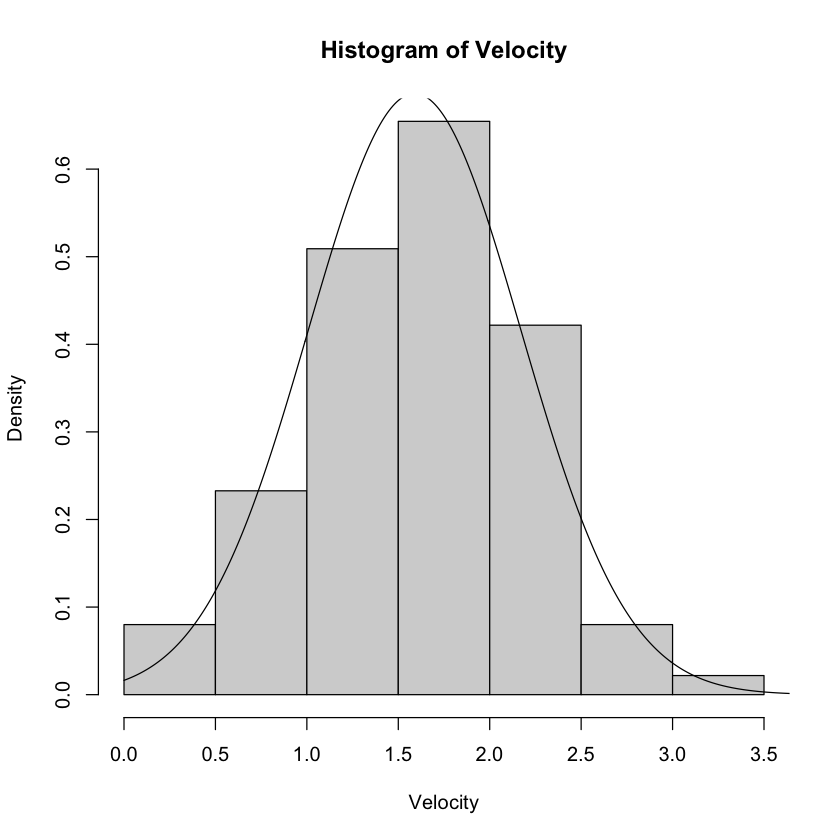

In [9]:
hist(Velocity, probability=TRUE)
lines(y.v~x.v)

How does your plot look? Does the curve match the histogram well? 

<span class="girk">**EXERCISE 9:**</span> Repeat the same plotting procedure (i.e. Exercises 3-8) for the variable **Depth** this time. Use variables *xbar.d, s.d, x.d, and y.d.* Plot the histogram and the normal density function as before. Is Depth approximately Normally distributed as well?

answer

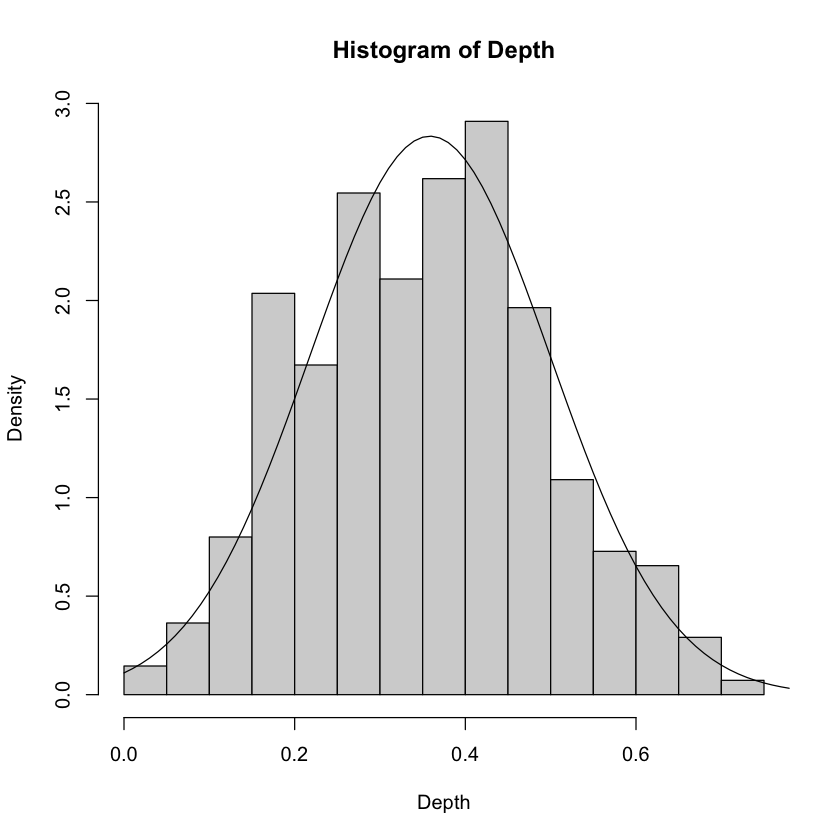

In [10]:
xbar.d = mean(Depth)
s.d = sd(Depth)
x.d=seq(from=0, to=1, by=0.01)
y.d=dnorm(x.d, mean=xbar.d, sd=s.d)

hist(Depth, probability=TRUE)
lines(y.d~x.d)